# 2.10 Wizualizacja stworzonego klasyfikatora
Drzewa decyzyjne mają kilka cennych własności, które odróżniają je od innych metod. Pozostałe zazwyczaj wizualizuje się zakreślając granice decyzyjne, ograniczając się przy tym do płaszczyzny,tj. ukazując ich zachowanie w momencie manipulowania dwiema wybranymi cechami. Jeśli jednak cech jest więcej, to jest to ogromne uproszczenie i nie jesteśmy w stanie uchwycić modelowanego zjawiska.

Załadujmy klasyfikator stworzony w poprzednim rozdziale i zobaczmy jak w jego przypadku można zamodelować proces decyzyjny bez ograniczania się do wybranych cech.

In [1]:
import pandas as pd

In [4]:
purchases_df = pd.read_parquet("../data/purchases_df.parquet").astype({
    "OperatingSystems": "category",
    "Browser": "category",
    "Region": "category",
    "TrafficType": "category",
    "Weekend": "int8",
})
purchases_df.dtypes

Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        int8
Revenue                        bool
dtype: object

In [5]:
X = purchases_df.drop(columns="Revenue")
y = purchases_df["Revenue"]

In [6]:
import joblib

In [8]:
classifier = joblib.load("../model/purchases_dtree.joblib")
classifier

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')),
                                                 ('numerical', 'passthrough',
                                                  Index(['Administrative', 'Administrative_Duration', 'Inform...
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object'))])),
                ('feature_elimination',
                 RFECV(cv=5,
                       estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        criterion='entropy',
                                                        max_depth=3,
                                                        max_features='sqrt',
                                                        random_state=253),
                       scoring='f1')),
                ('decision_tree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        max_features='sqrt',
                                        random_state=253))])

In [9]:
import json

In [11]:
with open("../model/purchases_dtree.features", 'r') as f:
    final_features = json.load(f)

## Zapis drzewa w postaci tekstowej
Stworzony klasyfikator można zaprezentować w postaci tekstowej, którą możemy przesłać dowolnej osobie, aby była w stanie zrozumieć jak postępuje nasz model. Czyni to drzewa decyzyjne jednym z najlepszych algorytmów, gdy zależy nam na wytłumaczalności.

In [12]:
from sklearn.tree import export_text

In [14]:
final_features

['Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'OperatingSystems_1',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_1',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_1',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',
 'TrafficType_18',
 'TrafficType_19',
 'TrafficType_20',
 

In [13]:
tree_rules = export_text(classifier.named_steps["decision_tree"], feature_names=final_features)
print(tree_rules)

ValueError: feature_names must contain 3 elements, got 75

## Prezentacja grafu decyzyjnego

In [15]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.tree import plot_tree

[Text(0.4583333333333333, 0.875, 'Month_Feb <= 0.053\nentropy = 1.0\nsamples = 12330\nvalue = [6165.0, 6165.0]'),
 Text(0.25, 0.625, 'Month_Feb <= 0.019\nentropy = 0.679\nsamples = 9601\nvalue = [5460.479, 1195.519]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'Month_Dec <= 0.022\nentropy = 0.679\nsamples = 9600\nvalue = [5459.888, 1195.519]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.745\nsamples = 7164\nvalue = [4039.016, 1085.66]'),
 Text(0.25, 0.125, 'entropy = 0.372\nsamples = 2436\nvalue = [1420.872, 109.858]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0.592, 0.0]'),
 Text(0.6666666666666666, 0.625, 'Month_Dec <= 0.0\nentropy = 0.541\nsamples = 2729\nvalue = [704.521, 4969.481]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'Month_Dec <= 0.0\nentropy = 0.338\nsamples = 1198\nvalue = [189.883, 2833.703]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.34\nsamples = 1193\nvalue = [189.883, 2817.547]'),
 T

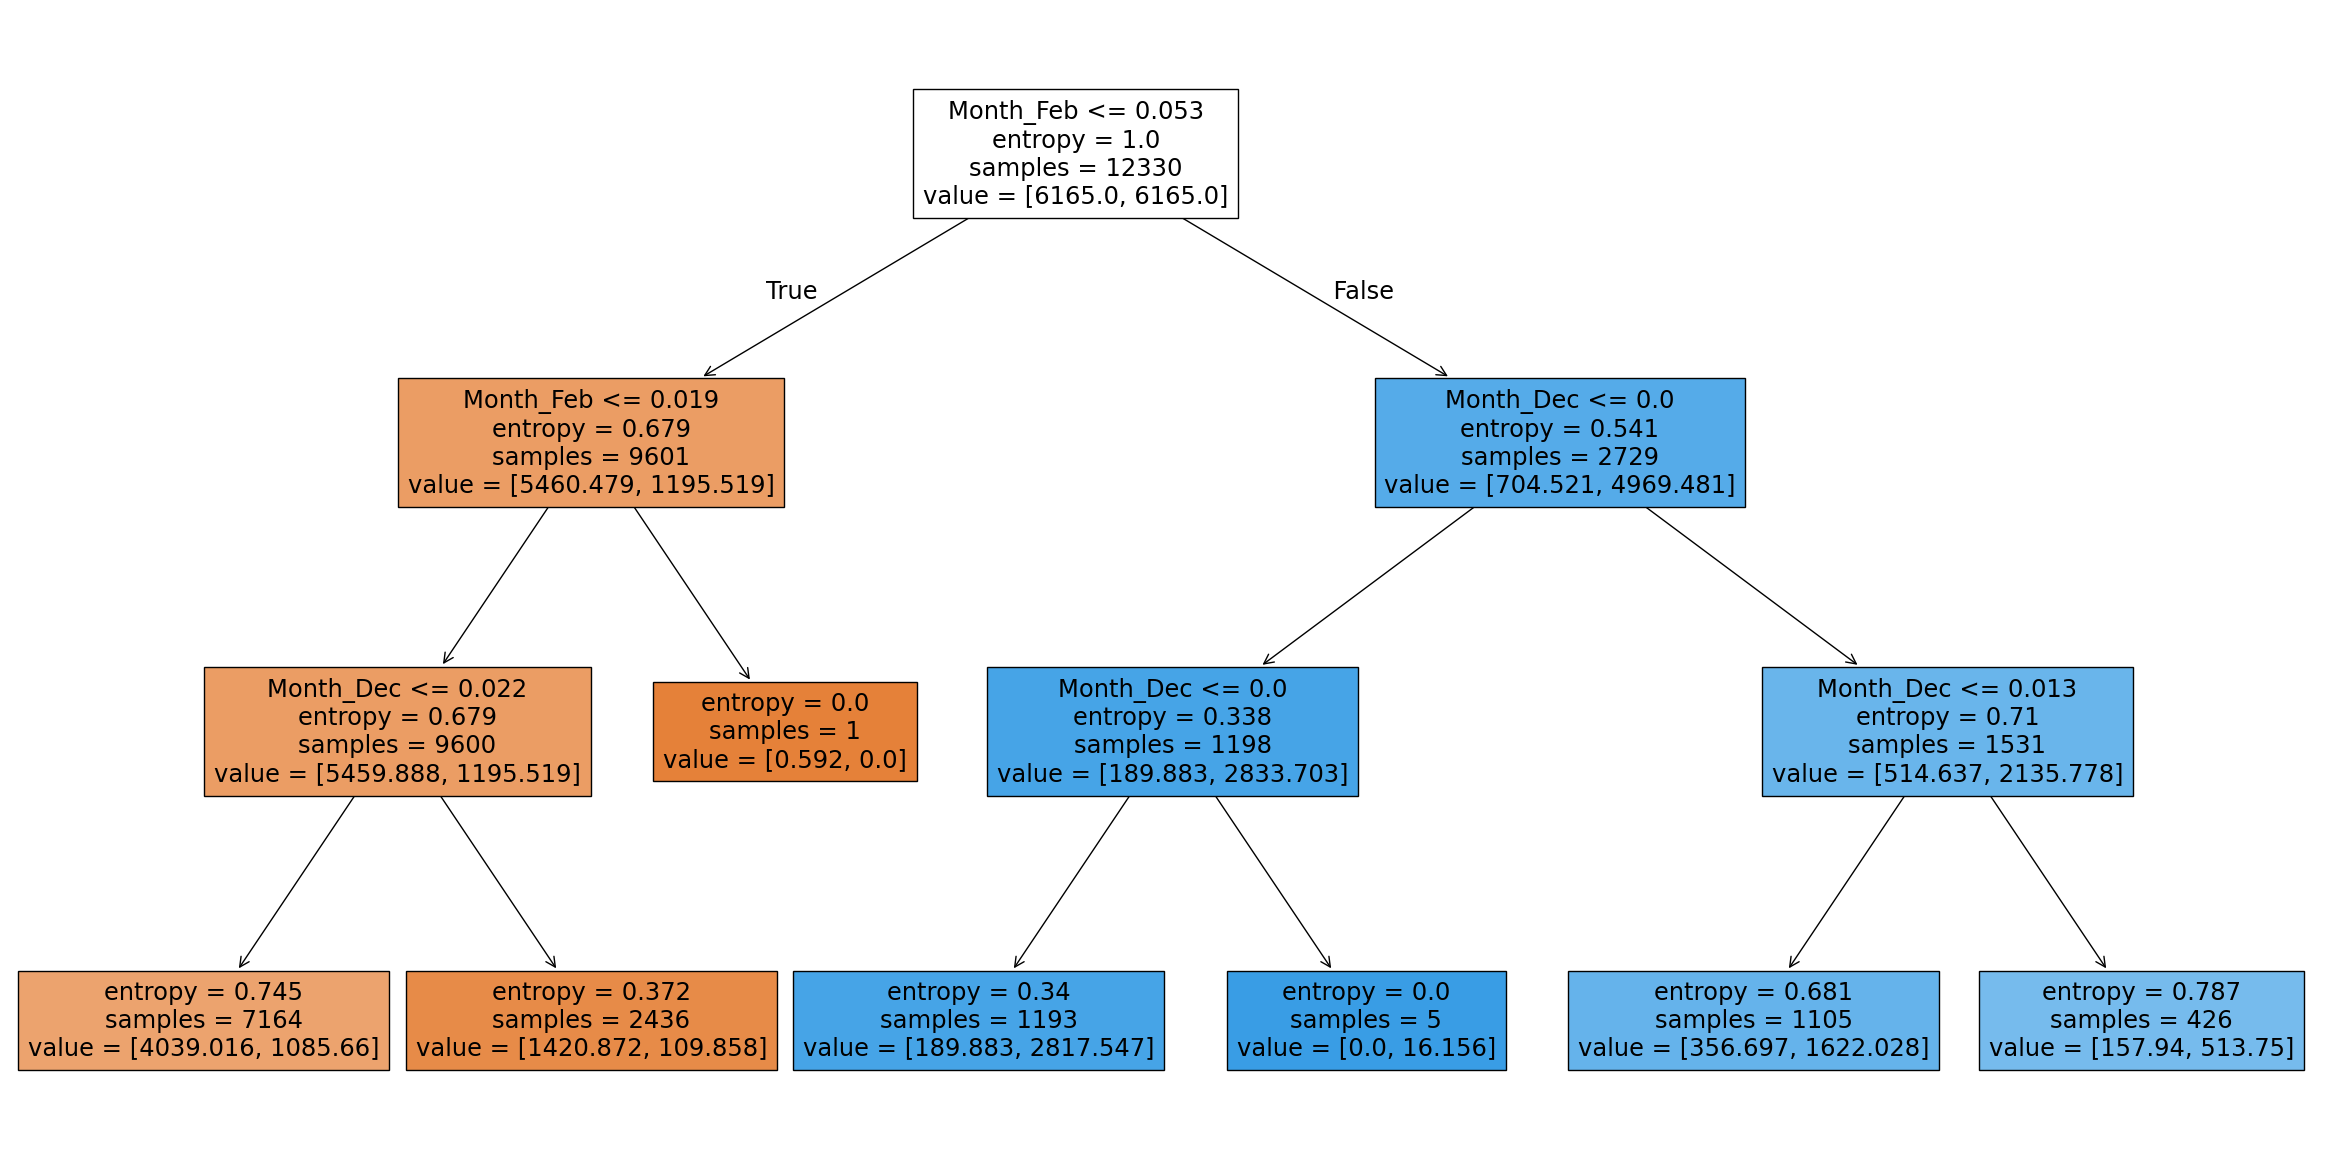

In [17]:
plt.figure(figsize=(30,15))
plot_tree(classifier.named_steps["decision_tree"], feature_names=final_features, filled=True)

## Śledzenie ścieżki podejmowania decyzji
Biblioteka scikit-learn umożliwia także prześledzenie w jaki sposób system podjął decyzję dla konkretnych przypadków.

In [18]:
X_test = X.sample(n=1, random_state=214)
X_test

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
9293,4,126.076923,2,43.333333,34,1395.445862,0.038928,0.042311,48.660718,0.0,Nov,3,2,1,10,Returning_Visitor,0


Implementacja drzewa decyzyjnego dostarcza metody decision_path, jednak nie jesteśmy w stanie jej uruchomić na obiekcie klasy Pipeline. Dlatego też musimy ręcznie uruchomić poszczególne kroki transformacji klasyfikatora.

In [19]:
dt = classifier._final_estimator

Xt = X_test
for _, _, transform in classifier._iter():
    if transform == classifier._final_estimator:
        break
    Xt = transform.transform(Xt)
    
decision_path = dt.decision_path(Xt)
print(decision_path)

  (0, 0)	1
  (0, 6)	1
  (0, 10)	1
  (0, 12)	1


W wyniku działania tej metody, uzyskujemy ścieżkę zbudowaną z identyfikatorów poszczególnych węzłów, przez który przeszedł dany przykład (pierwsza pozycja w krotce to pozycja przykładu ze zbioru przekazanego do metody, a druga identyfikator węzła w drzewie). Możemy na ich podstawie odczytać kolejne warunki, które zdecydowały o takiej, a nie innej klasie przypisanej do danego elementu.

In [20]:
for node_id in decision_path.indices:
    tree = dt.tree_
    feature = final_features[tree.feature[node_id]]
    threshold = tree.threshold[node_id]
    print(feature, "<=", threshold)

Month_Feb <= 0.05254204571247101
Month_Dec <= 8.10999990790151e-05
Month_Dec <= 0.012522401753813028
PageValues <= -2.0


Otrzymaliśmy zatem listę kolejnych kroków, przez które musiał przejść dany przykład, co pozwala nam nie tylko zwizualizować globalnie całe drzewo, ale także opowiedzieć historię klasyfikacji pojedynczego obiektu.